In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [190]:

# Simulating a construction dataset with an imbalanced target variable
np.random.seed(42)
n_samples = 1000

# Features (worker availability and temperature)
worker_availability = np.random.normal(5, 5, size=n_samples)  # Gaussian distribution with mean 5 and variance 5
worker_availability = np.clip(worker_availability, -20, 20)  # Clipping values within -20 to 20
temperature = np.random.normal(75, 10, size=n_samples)  # Gaussian distribution around 75F with std deviation of 10
temperature = np.clip(temperature, 50, 100)# Clipping temperature to stay within realistic bounds


# Creating an imbalanced delay condition: More delays when temperature > 70
delay_prob = np.where(temperature > 80, 0.5, 0.01)
delay_status = [np.random.choice(['On-Time', 'Delayed'], p=[1 - p, p]) for p in delay_prob]

In [191]:
# Creating DataFrame
data = pd.DataFrame({
    'Worker_Availability': worker_availability,
    'Temperature': temperature,
    'Delay_Status': delay_status
})

# Splitting into features and target
X = data.drop(columns=['Delay_Status'])
y = data['Delay_Status'].map({'On-Time': 0, 'Delayed': 1})  # Convert to binary labels

In [192]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

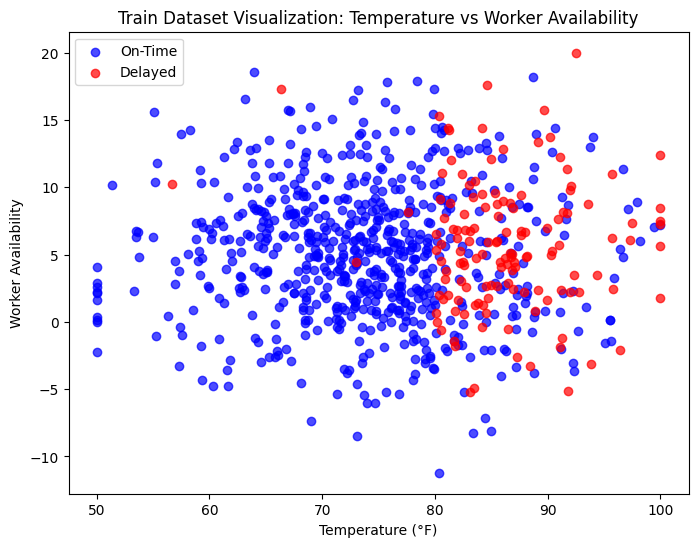

In [193]:
# Scatter plot visualization of train dataset without colorbar
plt.figure(figsize=(8,6))
plt.scatter(X_train['Temperature'][y_train == 0], X_train['Worker_Availability'][y_train == 0], color='blue', label='On-Time', alpha=0.7)
plt.scatter(X_train['Temperature'][y_train == 1], X_train['Worker_Availability'][y_train == 1], color='red', label='Delayed', alpha=0.7)
plt.xlabel('Temperature (°F)')
plt.ylabel('Worker Availability')
plt.title('Train Dataset Visualization: Temperature vs Worker Availability')
plt.legend()
plt.show()


In [194]:
# Build an Artificial Neural Network (ANN) Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predictions after balancing
y_pred = (model.predict(X_test) > 0.5).astype(int)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3194 - loss: 5.5968 - val_accuracy: 0.8250 - val_loss: 0.6794
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.5833 - val_accuracy: 0.8250 - val_loss: 0.4910
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8627 - loss: 0.4520 - val_accuracy: 0.8250 - val_loss: 0.4903
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8113 - loss: 0.5258 - val_accuracy: 0.8250 - val_loss: 0.4898
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8441 - loss: 0.4732 - val_accuracy: 0.8250 - val_loss: 0.5133
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.5041 - val_accuracy: 0.8250 - val_loss: 0.4932
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.4722 - val_accuracy: 0.8250 - val_loss: 0.4931
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.5142 - val_accuracy: 0.8250 - val_loss

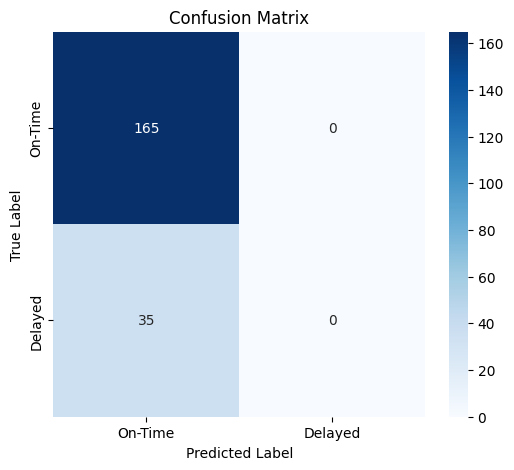

In [196]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On-Time', 'Delayed'], yticklabels=['On-Time', 'Delayed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()